In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from mpl_toolkits.mplot3d import Axes3D
np.random.seed(0)

# **Laboratorio 4**
Objetivo: Programar una regresión multivariada

## **1. Para simular un conjunto de características $x_1$ , $x_2$,..., $x_n$ trabajaremos en la primera parte con dos características de datos aleatorios que presentan un plano y mostraremos que los párametros optimizados se corresponden con el valor esperado.**

- Definir la ecuación  $y = 2.1*x_1 - 3.1*x_2$, y generar números aleatorios que pertenecen al plano. 

- Realizar un diagrama 3D de los puntos generados aleatoriamente. 


Nuestro objetivo será encontrar los valores $\theta_0 = 0, \theta_1=2.1, \theta_1=3.1$ que mejor ajustar el plano, empleando cálculos vectorizados. 

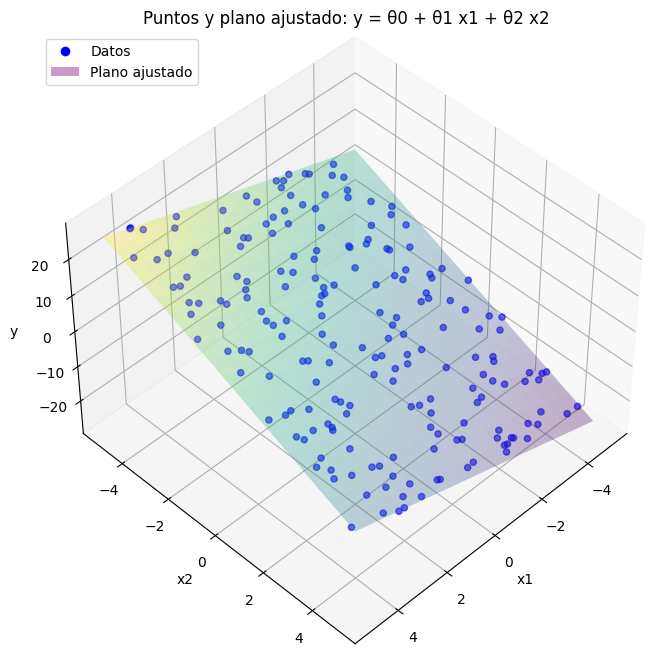

In [ ]:
# Definimos las variables x1, x2 y obtenemos el plano y
n_samples = 200
x1 = np.random.uniform(-5, 5, n_samples)
x2 = np.random.uniform(-5, 5, n_samples)
y  = 2.1*x1 - 3.1*x2

X = np.column_stack([np.ones(n_samples), x1, x2]) # Construimos la matriz de características
theta_norm = np.linalg.inv(X.T @ X) @ (X.T @ y) # Por teorema demostrado en clase: Theta = (XX^T)^-1(XY)


# Gráfico 3D de puntos + plano
fig = plt.figure(figsize=(16, 8))
ax  = fig.add_subplot(111, projection='3d')

# Scatter de los puntos
pts = ax.scatter(x1, x2, y,
                 c='b', marker='o', alpha=0.6)

# Malla y plano ajustado
grid_x1 = np.linspace(x1.min(), x1.max(), 20)
grid_x2 = np.linspace(x2.min(), x2.max(), 20)
X1_m, X2_m = np.meshgrid(grid_x1, grid_x2)
Y_m = theta_norm[0] + theta_norm[1]*X1_m + theta_norm[2]*X2_m

ax.plot_surface(X1_m, X2_m, Y_m, cmap='viridis', alpha=0.3)

# Construcción manual de la leyenda
legend_handles = [
    Line2D([0],[0], marker='o', color='w',
           markerfacecolor='b', markersize=8, label='Datos'),
    Patch(facecolor='purple', edgecolor='none', alpha=0.4,
          label='Plano ajustado')
]

ax.legend(handles=legend_handles, loc='upper left')

# Etiquetas
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('Puntos y plano ajustado: y = θ0 + θ1 x1 + θ2 x2')
ax.view_init(elev=45, azim=45)

plt.show()

## **2. Inicializar conjunto de parámetros $\Theta$ de manera aleatoria.**

In [ ]:
n = 2
theta_random = np.random.randn(n + 1)
print("Theta inicial aleatoria:", theta_random)

Theta inicial aleatoria: [ 0.69377315 -0.15957344 -0.13370156]


## **3. Construir la matrix X con dimensiones $(n+1, m)$, m es el numero de datos de entrenamiento y (n) el número de caracteristicas.**

In [ ]:
m = n_samples
X = np.vstack((np.ones(m), x1, x2))
print("Forma de X:", X.shape)

Forma de X: (3, 200)


## **4. Calcular la función de coste(revise cuidosamente las dimensiones de cada matriz):**
 
  - $h = \Theta^{T} X $
  - $\Lambda= (h -Y) $
  - $\Lambda*= (h -Y)^2 $
  - $\Lambda= [\Lambda_1,\Lambda_2, ...,\Lambda_m]$
  - $J = \frac{1}{2m} \sum_{i}^m \Lambda_i $

In [ ]:
def compute_cost(theta, X, y):
    m = y.shape[0]

    # Aseguramos que theta tenga forma (n+1, )
    theta = theta.reshape(-1)

    # Predicciones
    h = X @ theta

    # Error
    error = h - y.flatten()

    # Errores al cuadrado
    sq_errors = error ** 2

    # Coste escalar: J = (1/(2m)) * sum(sq_errors)
    J = np.sum(sq_errors) / (2 * m)
    return J

In [ ]:
# Generamos datos sintéticos
n_samples = 200
x1 = np.random.uniform(-5, 5, n_samples)
x2 = np.random.uniform(-5, 5, n_samples)
y = 2.1 * x1 - 3.1 * x2

# Construcción de la matriz X en forma (m, n+1)
X = np.column_stack([np.ones(n_samples), x1, x2])

# Inicializar θ (aleatoria)
theta_random = np.random.randn(3)

# Cálculo del coste
cost_value = compute_cost(theta_random, X, y)
print("Coste con θ aleatoria:", cost_value)

Coste con θ aleatoria: 56.4525570888521


## **5. Aplicar el gradiente descendente:** 
  - Encontrar el gradiente.
    $\nabla J = \Lambda X.T$
  
  - Actualizar los nuevos parametros: 
    $\Theta_{n+1}=\Theta_{n}-\alpha\nabla J$

In [ ]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    J_history = []

    for i in range(num_iters):
        h = X @ theta
        error = h - y
        gradient = (1 / m) * (X.T @ error)
        theta = theta - alpha * gradient

        # Calcular y registrar el coste actual
        cost = np.sum(error**2) / (2 * m)
        J_history.append(cost)

    return theta, J_history


In [ ]:
alpha = 0.01
num_iters = 1000

theta_opt, cost_hist = gradient_descent(X, y, theta_random, alpha, num_iters)

print("Theta optimizado:", theta_opt)
print("Coste inicial:", cost_hist[0])
print("Coste final:", cost_hist[-1])

Theta optimizado: [ 5.36497721e-05  2.09999985e+00 -3.09999854e+00]
Coste inicial: 56.4525570888521
Coste final: 1.4616116789174414e-09


## **6. Iterar para encontrar los valores $\Theta$ que se ajustan el plano.**

Theta optimizada: [-0.11304056  2.09891284 -3.09860968]
Coste inicial: 106.0027, final: 0.0065


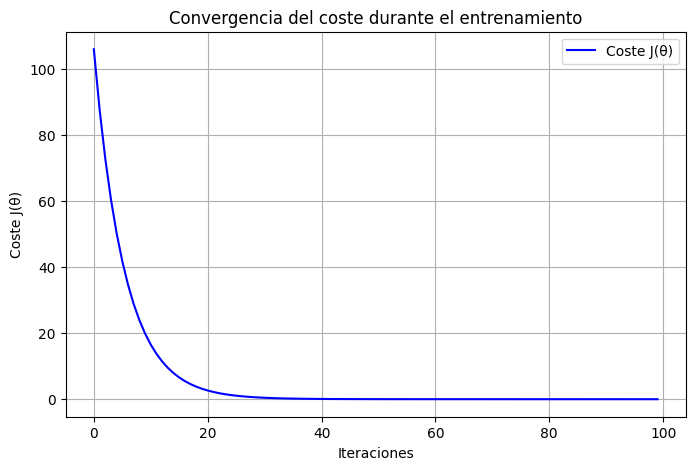

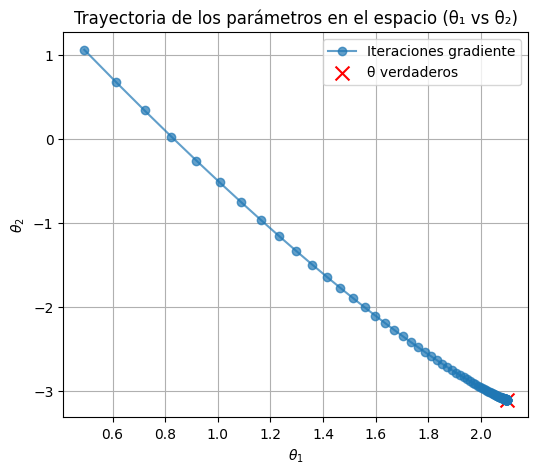

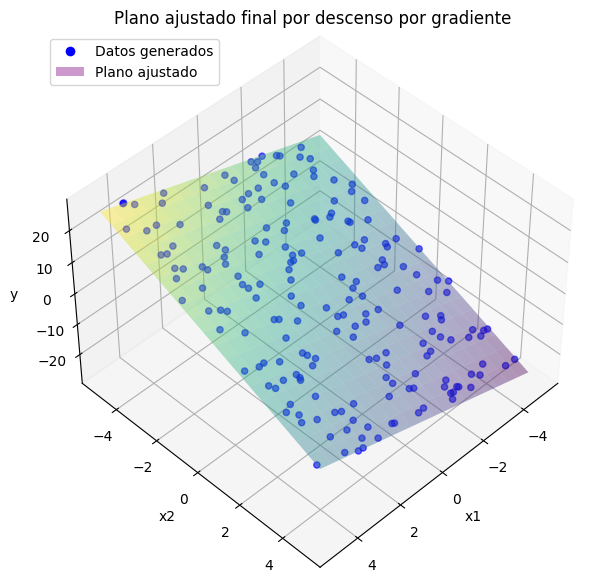

In [ ]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    cost_history = []
    theta_history = []

    for i in range(num_iters):
        h = X @ theta
        error = h - y
        gradient = (1/m) * (X.T @ error)
        theta = theta - alpha * gradient

        cost = np.sum(error**2) / (2*m)
        cost_history.append(cost)
        theta_history.append(theta.copy())

    return theta, np.array(cost_history), np.array(theta_history)

# Datos sintéticos ya generados: x1, x2, y, n_samples

m = n_samples
X = np.column_stack([np.ones(m), x1, x2])
theta_init = np.random.randn(3)
alpha = 0.01
num_iters = 100

theta_opt, cost_hist, theta_hist = gradient_descent(X, y, theta_init, alpha, num_iters)

print("Theta optimizada:", theta_opt)
print(f"Coste inicial: {cost_hist[0]:.4f}, final: {cost_hist[-1]:.4f}")

# Coste vs iteraciones
plt.figure(figsize=(8, 5))
plt.plot(range(num_iters), cost_hist, 'b-', label='Coste J(θ)')
plt.xlabel('Iteraciones')
plt.ylabel('Coste J(θ)')
plt.title('Convergencia del coste durante el entrenamiento')
plt.legend()
plt.grid(True)
plt.show()

# Trayectoria de Θ (θ₁ vs θ₂) con punto real
plt.figure(figsize=(6, 5))
plt.plot(theta_hist[:, 1], theta_hist[:, 2], 'o-', alpha=0.7, label='Iteraciones gradiente')
plt.scatter([2.1], [-3.1], color='red', marker='x', s=100, label='θ verdaderos')
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')
plt.title('Trayectoria de los parámetros en el espacio (θ₁ vs θ₂)')
plt.legend()
plt.grid(True)
plt.show()

# Plano final ajustado en 3D vs datos
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x1, x2, y, c='b', alpha=0.6, label='Datos generados')

# Malla para plano
grid_x1 = np.linspace(x1.min(), x1.max(), 20)
grid_x2 = np.linspace(x2.min(), x2.max(), 20)
X1_m, X2_m = np.meshgrid(grid_x1, grid_x2)
Y_m = theta_opt[0] + theta_opt[1]*X1_m + theta_opt[2]*X2_m
surface = ax.plot_surface(X1_m, X2_m, Y_m, cmap='viridis', alpha=0.4)


legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Datos generados',
           markerfacecolor='b', markersize=8),
    Patch(facecolor='purple', edgecolor='none', alpha=0.4, label='Plano ajustado')
]
ax.legend(handles=legend_elements, loc='upper left')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('Plano ajustado final por descenso por gradiente')
ax.view_init(elev=45, azim=45)
plt.show()